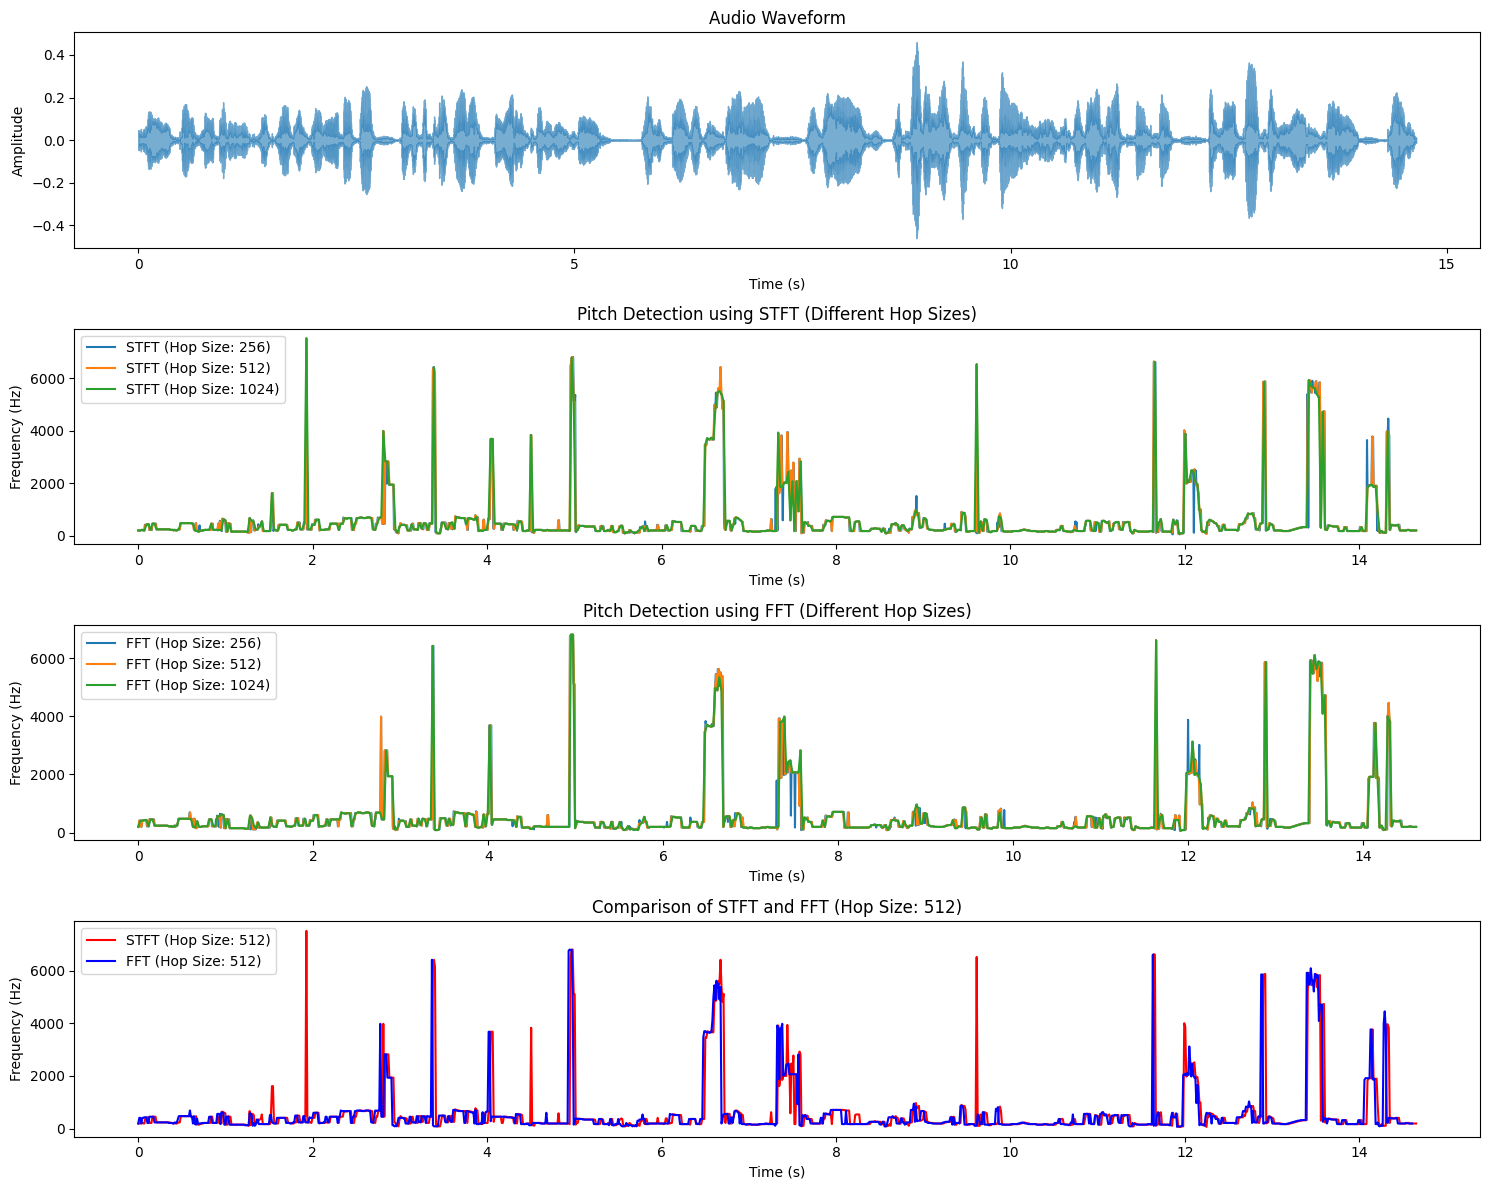

In [8]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = './Data/speech_5.wav'  # Replace with your file path
y, sr = librosa.load(audio_file, sr=None)

# Parameters for STFT and FFT
n_fft = 2048  
hop_sizes = [256, 512, 1024]  

# Initialize results storage
pitch_stft_results = {}
pitch_fft_results = {}

# Loop through each hop size
for hop_length in hop_sizes:
    # Compute the STFT
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)

    # Get the frequency bins
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # Detect pitch using STFT
    pitch_stft = []
    for frame in magnitude.T:
        max_idx = np.argmax(frame)  
        pitch_freq = frequencies[max_idx]  
        pitch_stft.append(pitch_freq)
    pitch_stft_results[hop_length] = pitch_stft

    # Detect pitch using FFT
    frame_size = 2048  
    pitch_fft = []
    for i in range(0, len(y) - frame_size, hop_length):
        frame = y[i:i + frame_size]
        fft_spectrum = np.fft.rfft(frame)
        fft_magnitude = np.abs(fft_spectrum)
        fft_frequencies = np.fft.rfftfreq(len(frame), d=1/sr)
        max_idx = np.argmax(fft_magnitude)  
        pitch_freq = fft_frequencies[max_idx] 
        pitch_fft.append(pitch_freq)
    pitch_fft_results[hop_length] = pitch_fft

# Plot the results
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
for hop_length, pitch_stft in pitch_stft_results.items():
    times_stft = librosa.frames_to_time(np.arange(len(pitch_stft)), sr=sr, hop_length=hop_length)
    plt.plot(times_stft, pitch_stft, label=f'STFT (Hop Size: {hop_length})')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Detection using STFT (Different Hop Sizes)')
plt.legend()

plt.subplot(4, 1, 3)
for hop_length, pitch_fft in pitch_fft_results.items():
    times_fft = np.arange(len(pitch_fft)) * hop_length / sr
    plt.plot(times_fft, pitch_fft, label=f'FFT (Hop Size: {hop_length})')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Detection using FFT (Different Hop Sizes)')
plt.legend()

plt.subplot(4, 1, 4)
times_stft_default = librosa.frames_to_time(np.arange(len(pitch_stft_results[512])), sr=sr, hop_length=512)
times_fft_default = np.arange(len(pitch_fft_results[512])) * 512 / sr
plt.plot(times_stft_default, pitch_stft_results[512], label='STFT (Hop Size: 512)', color='r')
plt.plot(times_fft_default, pitch_fft_results[512], label='FFT (Hop Size: 512)', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Comparison of STFT and FFT (Hop Size: 512)')
plt.legend()

plt.tight_layout()
plt.show()